In [51]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt

# Exercise 1 

In [52]:
S = np.array([100 , 50 , 25])
Q = np.array([1 , 3 , 5])
sig = np.log(S)
delta_sig_sd = np.array([1 , 2 , 3]) * 10**-3
N = 10**4
alpha = np.arange(.9,1,.01)

In [53]:
col_names = ['t3_1' , 't10_1' , 't50_1' , 'norm_1' , 't3_2' , 't10_2' , 't50_2' , 'norm_2' ,'t3_3' , 't10_3' , 't50_3' , 'norm_3']
df = pd.DataFrame(columns = col_names , index = range(N))
DoF = np.array([3 , 10 , 50])
for i in range(len(S)):
    scale_par = np.sqrt(DoF / (DoF - 2))/ delta_sig_sd[i]
    df[col_names[(i)*4]] = np.random.standard_t(DoF[0],N) / scale_par[0]
    df[col_names[(i)*4 +1]] = np.random.standard_t(DoF[1],N) / scale_par[1]
    df[col_names[(i)*4 +2]] = np.random.standard_t(DoF[2],N) / scale_par[2]
    df[col_names[(i)*4 +3]] = np.random.normal(0,delta_sig_sd[i],N)

In [54]:
col_names2 = ['t3' , 't10' , 't50' , 'norm']
df2 = pd.DataFrame(columns = col_names2 , index = range(N))
df2['t3'] = -(S * Q * (np.exp(df[['t3_1','t3_2','t3_3']]) - 1)).sum(axis = 1)
df2['t10'] = -(S * Q*(np.exp(df[['t10_1','t10_2','t10_3']]) - 1)).sum(axis = 1)
df2['t50'] = -(S * Q*(np.exp(df[['t50_1','t50_2','t50_3']]) - 1)).sum(axis = 1)
df2['norm'] = -(S * Q*(np.exp(df[['norm_1','norm_2','norm_3']]) - 1)).sum(axis = 1)

In [55]:
df2

,t3,t10,t50,norm
0,-0.098089,0.254797,-0.020353,-0.465098
1,-0.106383,-0.092659,-0.067851,0.664502
2,0.071467,1.089503,-0.212070,0.728610
3,-0.258720,0.345201,1.351457,-0.749903
4,-0.001324,0.346653,-0.110621,-0.164235
5,-0.256058,-0.018943,0.382812,-0.248799
6,0.413503,0.732266,0.630815,-0.008750
7,0.204868,0.048554,0.255032,-0.372994
8,0.592880,0.042740,0.293473,0.074472
9,0.386346,-0.942580,0.886480,-0.623982


In [56]:
df2.quantile(alpha)

,t3,t10,t50,norm
0.90,0.512662,0.614544,0.638001,0.625358
0.91,0.544838,0.644528,0.668833,0.651091
0.92,0.580037,0.675983,0.700675,0.682602
0.93,0.610234,0.709872,0.733609,0.714114
0.94,0.656883,0.745851,0.766785,0.757233
0.95,0.703393,0.794758,0.812310,0.799257
0.96,0.786932,0.844849,0.866381,0.836231
0.97,0.862576,0.914596,0.924333,0.895719
0.98,0.978795,1.009784,1.012784,0.981213
0.99,1.251395,1.194717,1.180388,1.111318


In [57]:
df2.quantile(alpha) - df2.mean()

,t3,t10,t50,norm
0.90,0.517072,0.610347,0.637611,0.628249
0.91,0.549248,0.640330,0.668443,0.653982
0.92,0.584448,0.671786,0.700285,0.685493
0.93,0.614644,0.705675,0.733219,0.717005
0.94,0.661293,0.741654,0.766395,0.760124
0.95,0.707803,0.790561,0.811920,0.802148
0.96,0.791342,0.840652,0.865991,0.839122
0.97,0.866987,0.910399,0.923943,0.898610
0.98,0.983205,1.005587,1.012394,0.984104
0.99,1.255805,1.190520,1.179999,1.114209


In [58]:
df_VaR = pd.DataFrame(columns = col_names2,index = alpha)
for i in range(len(alpha)):
    for j in range(len(col_names2)):
        #df_inter = df2[col_names2[j]].sort_values(ascending = False)[:int(round(N * (alpha[i])))]
        #df_inter = df2.sort_values()[:int(round((N*(1-alpha[i]))))]
        df_VaR.at[alpha[i],col_names2[j]] = df2[col_names2[j]].sort_values(ascending = False)[:int(round(N * (1 - alpha[i])))].mean()
df_VaR

,t3,t10,t50,norm
0.90,0.8307,0.860476,0.873789,0.84526
0.91,0.864239,0.886248,0.898494,0.868235
0.92,0.902122,0.914662,0.925367,0.893393
0.93,0.945988,0.946298,0.955342,0.921096
0.94,0.998004,0.982846,0.989644,0.952077
0.95,1.06169,1.0258,1.02948,0.98692
0.96,1.14117,1.07718,1.07654,1.02953
0.97,1.24723,1.14368,1.13727,1.08513
0.98,1.41511,1.23449,1.22238,1.15949
0.99,1.73432,1.3758,1.357,1.27952


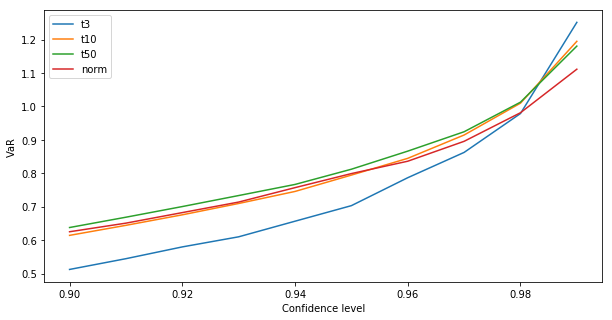

In [59]:
#Plot VaR
plt.figure(figsize = (10,5))
plt.plot(df2.quantile(alpha))
plt.xlabel('Confidence level')
plt.ylabel('VaR')
plt.legend(df2.columns)

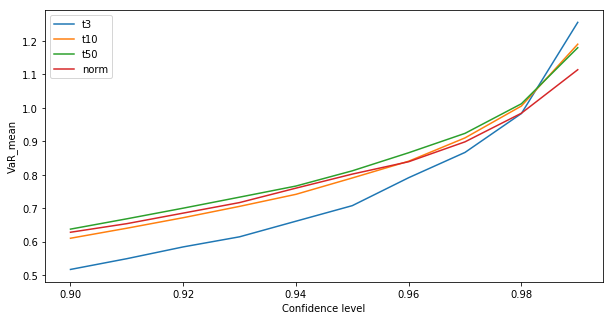

In [60]:
#Plot VaR mean
plt.figure(figsize = (10,5))
plt.plot(df2.quantile(alpha) - df2.mean())
plt.xlabel('Confidence level')
plt.ylabel('VaR_mean')
plt.legend(df2.columns)

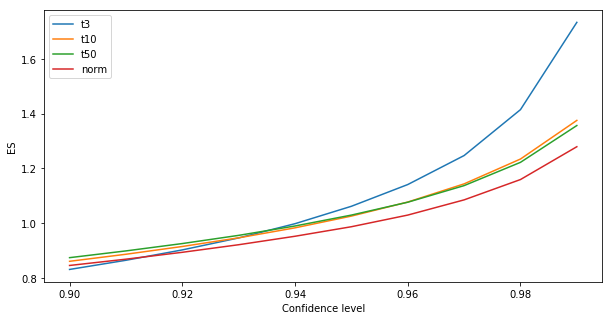

In [61]:
#Plot ES
plt.figure(figsize = (10,5))
plt.plot(df_VaR)
plt.xlabel('Confidence level')
plt.ylabel('ES')
plt.legend(df_VaR)

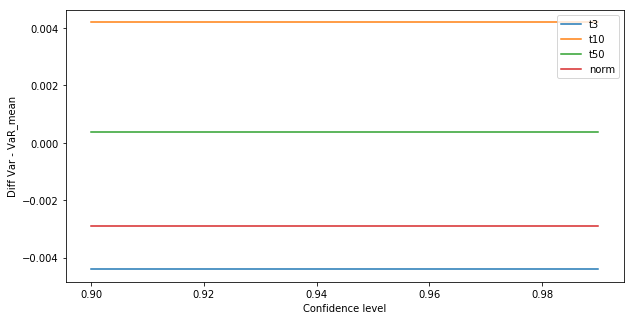

In [62]:
#Plot diff VaR and Var_mean
plt.figure(figsize = (10,5))
plt.plot(df2.quantile(alpha) - (df2.quantile(alpha) - df2.mean()))
plt.xlabel('Confidence level')
plt.ylabel('Diff Var - VaR_mean')
plt.legend(df2.columns)

# Exercise 2

In [64]:
#Set parameters
T = 0.5
r = 0.05
sig = 0.2
S = 100
K = 100
dt = 1/252
q = 0

In [65]:
alpha = np.array([0.95,0.99])
cov = np.array([[10**-6, -0.5 * 10**-7],[-0.5 * 10**-7, 10**-8]])
df = pd.DataFrame(np.random.multivariate_normal([0,0],cov,10**4),columns = ['X_1' , 'X_3'])

In [66]:
def European_Call (S,K,T,q,r,sig):
    d1 = (np.log(S/K) + (r - q + sig**2/2) * T)/(sig * np.sqrt(T))
    d2 = d1 - sig * np.sqrt(T)
    return S * np.exp(-q * T) * stats.norm.cdf(d1) - K * np.exp(-r * T) * stats.norm.cdf(d2)

def Theta(S,K,q,r,sig,delta):
    d1 = (np.log(S/K) + (r - q + sig**2 /2) * delta) / (sig * np.sqrt(delta))
    d2 = d1 - sig * np.sqrt(delta)
    return - np.exp(- q * delta) * S * stats.norm.pdf(d1) * sig / ( 2 * np.sqrt(delta)) - r * K * np.exp(- r * delta) * stats.norm.cdf(d2) + q * S * np.exp(-q * delta) * stats.norm.cdf(d1)

def Delta(S,K,q,r,sig,delta):
    d1 = (np.log(S/K) + (r - q + sig**2 /2) * delta) / (sig * np.sqrt(delta))
    return np.exp(-q*delta) * stats.norm.cdf(d1)

def Vega(S,K,q,r,sig,delta):
    d1 = (np.log(S/K) + (r - q + sig**2 /2) * delta) / (sig * np.sqrt(delta))
    return S * np.exp(-q * delta) * stats.norm.pdf(d1) * np.sqrt(delta)




In [67]:
C0 = European_Call(S,K,T,q,r,sig)
df_real = pd.DataFrame(columns = ['Price' , 'Sig'])
df_real.Price = S * np.exp(df.X_1)
df_real.Sig = sig + df.X_3

In [68]:
Val = pd.DataFrame(columns = ['Monte_Carlo' , 'Lin_Loss'])

In [69]:
Val.Monte_Carlo = C0 - European_Call(df_real.Price, K , T , q , r , df_real.Sig) - S + df_real.Price

In [70]:
Val.Lin_Loss = - (Theta(S,K,q,r,sig,T) * dt + df.X_1 * S *(1 + Delta(S,K,q,r,sig,T)) + df.X_3 * Vega(S,K,q,r,sig,T))

In [71]:
VaR = pd.DataFrame(index = ['Monte_Carlo' , 'Lin_Loss' , 'VarCovar'],columns = ['VaR_0.05','VaR_mean_0.05','ES_0.05','VaR_0.01','VaR_mean_0.01','ES_0.01'])

In [72]:
VaR.loc['Monte_Carlo'][0] = Val.Monte_Carlo.quantile(1 - alpha[0])
VaR.loc['Monte_Carlo'][1] = VaR.loc['Monte_Carlo'][0] - Val.Monte_Carlo.mean()
VaR.loc['Monte_Carlo'][2] = Val.Monte_Carlo.sort_values()[:int(round(N * (1 - alpha[0])))].mean()
VaR.loc['Monte_Carlo'][3] = Val.Monte_Carlo.quantile(1 - alpha[1])
VaR.loc['Monte_Carlo'][4] = VaR.loc['Monte_Carlo'][3] - Val.Monte_Carlo.mean()
VaR.loc['Monte_Carlo'][5] = Val.Monte_Carlo.sort_values()[:int(round(N * (1 - alpha[1])))].mean()

In [73]:
VaR.loc['Lin_Loss'][0] = Val.Lin_Loss.quantile(1 - alpha[0])
VaR.loc['Lin_Loss'][1] = VaR.loc['Lin_Loss'][0] - Val.Lin_Loss.mean()
VaR.loc['Lin_Loss'][2] = Val.Lin_Loss.sort_values()[:int(round(N * (1 - alpha[0])))].mean()
VaR.loc['Lin_Loss'][3] = Val.Lin_Loss.quantile(1 - alpha[1])
VaR.loc['Lin_Loss'][4] = VaR.loc['Lin_Loss'][3] - Val.Lin_Loss.mean()
VaR.loc['Lin_Loss'][5] = Val.Lin_Loss.sort_values()[:int(round(N * (1 - alpha[1])))].mean()

In [74]:
B = np.array([ (Delta(S,K,q,r,sig,T) + 1) * S , Vega(S,K,q,r,sig,T)])
VaR.loc['VarCovar'][0] = - Theta(S,K,q,r,sig,T) * dt + np.sqrt(np.matmul(B.transpose(),np.matmul(B,cov))) * stats.norm.ppf(1 - alpha[0])
VaR.loc['VarCovar'][1] = VaR.loc['VarCovar'][0]
VaR.loc['VarCovar'][2] = - Theta(S,K,q,r,sig,T) * dt + np.sqrt(np.matmul(B.transpose(),np.matmul(B,cov))) * stats.norm.pdf(stats.norm.ppf(1 - alpha[0]))/alpha[0]
VaR.loc['VarCovar'][3] = - Theta(S,K,q,r,sig,T) * dt + np.sqrt(np.matmul(B.transpose(),np.matmul(B,cov))) * stats.norm.ppf(1 - alpha[1])
VaR.loc['VarCovar'][4] = VaR.loc['VarCovar'][3]
VaR.loc['VarCovar'][5] = - Theta(S,K,q,r,sig,T) * dt + np.sqrt(np.matmul(B.transpose(),np.matmul(B,cov))) * stats.norm.pdf(stats.norm.ppf(1 - alpha[1]))/alpha[1]

In [75]:
VaR

,VaR_0.05,VaR_mean_0.05,ES_0.05,VaR_0.01,VaR_mean_0.01,ES_0.01
Monte_Carlo,-0.0684737,-0.0684405,-0.0864117,-0.0975878,-0.0975545,-0.11065
Lin_Loss,-0.226462,-0.258285,-0.291916,-0.335745,-0.367568,-0.385898
VarCovar,-0.228377,-0.228377,0.0494053,-0.336341,-0.336341,0.0364712
